# Forest Fires Data Exploration

Data Science Project for Exploring Forest Fires in Portuguese

import neccessary package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

retrieve the data

In [2]:
ff = pd.read_csv('data/forestfires.csv')
ff.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


Column Information
<ol>
    <li>X - x-axis spatial coordinate within the Montesinho park map: 1 to 9</li>
    <li>Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9</li>
    <li>month - month of the year: "jan" to "dec" </li>
    <li>day - day of the week: "mon" to "sun"</li>
    <li>FFMC - FFMC index from the FWI system: 18.7 to 96.20</li>
    <li>DMC - DMC index from the FWI system: 1.1 to 291.3 </li>
    <li>DC - DC index from the FWI system: 7.9 to 860.6</li>
    <li>ISI - ISI index from the FWI system: 0.0 to 56.10</li>
    <li>temp - temperature in Celsius degrees: 2.2 to 33.30</li>
    <li>RH - relative humidity in %: 15.0 to 100</li>
    <li>wind - wind speed in km/h: 0.40 to 9.40</li>
    <li>rain - outside rain in mm/m2 : 0.0 to 6.4 </li>
    <li>area - the burned area of the forest (in ha): 0.00 to 1090.84 </li>
</ol>

sort the value that will be used for analytical necessary 

In [3]:
ff_sorted = ff.sort_values(by=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'] ,ascending=False )
ff_sorted.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
496,4,5,aug,mon,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,2.77
495,6,6,aug,mon,96.2,175.5,661.8,16.8,23.9,42,2.2,0.0,0.00
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
494,6,6,aug,sat,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,8.59
167,6,5,aug,wed,96.0,127.1,570.5,16.5,23.4,33,4.5,0.0,2.51


looking for column info from the data

In [4]:
ff_sorted.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 496 to 379
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 56.5+ KB


## Feature Correlation Analysis

In [5]:
ff.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


## Visualization

to find out variables whiches are correlated each other that indicated by darker colour <br>
then defined the train and test data

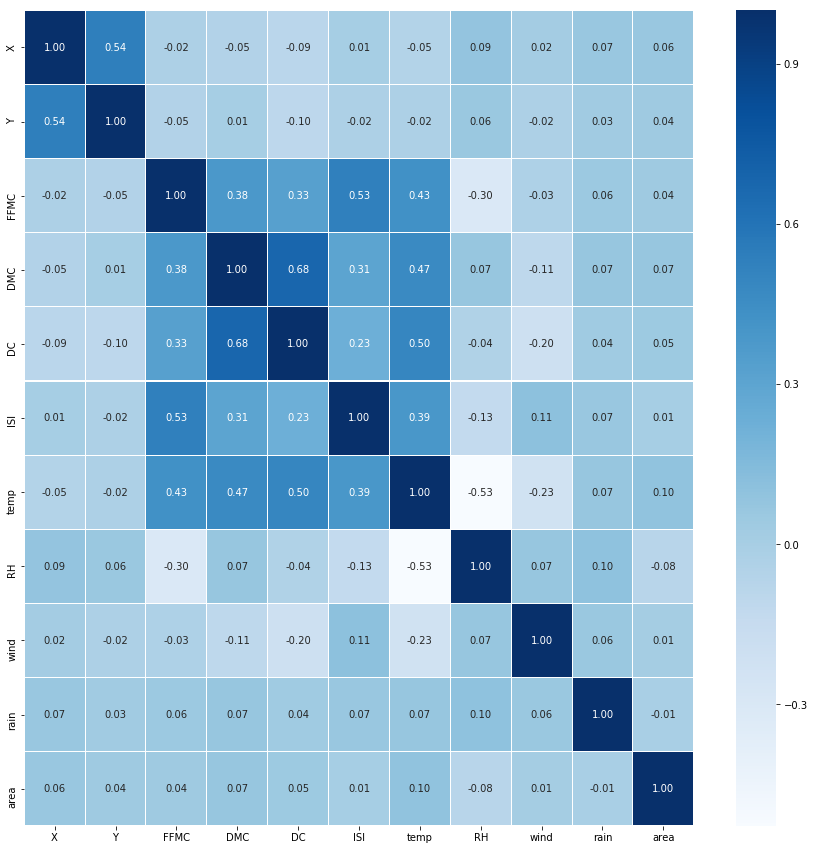

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(ff.corr(),annot=True,linewidths=.10, fmt= '.2f', cmap='Blues')

from the graphic above, can be conclude that<br>
<ul>
    <li>FFMC (Fine Fuel Moisture Code) is effect on ISI (Initial Spread Index)</li>
    <li>Temp is effect on DMC (duff moisture code), DC (drought code), and FFMC (Fine Fuel Moisture Code)</li>
</ul>

### Import Package to Machine Learning

In [7]:
# To get Min-Max or Standard, use this package
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Numerical Data Normalization

In [8]:
# For Min-Max
# change data value into 0 and 1
scaler1 = MinMaxScaler()

# For Standard
# change data value into -2 and -2
scaler2 = StandardScaler()

In [9]:
# show MinMax Scaler value  in scaler 1
scaler1

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
# show Standard Scaler value  in scaler 2
scaler2

StandardScaler(copy=True, with_mean=True, with_std=True)

### Fitting Process

fitting is the function for machine learning learn the data

deleting non-numerical column with drop function

In [11]:
ff_numerical = ff.drop(['month','day'], axis = 1)
ff_numerical.head(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## Distribution Analysis 

change ff numerical format as table with DataFrame

In [12]:
table_ff = pd.DataFrame(ff_numerical)
table_ff.head(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


find out Means score and Standar Deviation

specify the index, because each values of mean and standar deviation printed as array format

In [13]:
# Mean, using mean() function
print("Mean of Numerical FF :",table_ff.mean()[0])

# Standar Deviation, using std()
print("Standar Deviation of Numerical FF :",table_ff.std()[0])

Mean of Numerical FF : 4.669245647969052
Standar Deviation of Numerical FF : 2.3137778287257666


count the Normal Distribution

round function returns a floating point number that is a rounded version of the specified number, with the specified number of decimals

normal distribution formula = (X - mean) / Standar Deviation 

X is refer to value that is being standardized

In [14]:
table_ff['normalized'] = round((table_ff - table_ff.mean()[0])/table_ff.std()[0]) 
table_ff['normalized']

ValueError: Wrong number of items passed 11, placement implies 1

visualize the normal distribution result

ValueError: color kwarg must have one color per data set. 11 data sets and 1 colors were provided

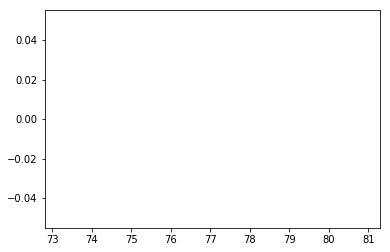

In [16]:
sns.distplot(table_ff)

fit data scaler 1 and scaler 2 one by one with ff data that numeric table only

In [17]:
# data scaler 1 fitting and transform proces
ff_scaler1 = scaler1.fit_transform(ff_numerical)
ff_scaler1

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.75      , 0.42857143, 0.87096774, ..., 0.7       , 0.        ,
        0.        ],
       [0.75      , 0.28571429, 0.92774194, ..., 0.05555556, 0.        ,
        0.        ],
       [0.75      , 0.28571429, 0.92774194, ..., 0.1       , 0.        ,
        0.        ],
       ...,
       [0.75      , 0.28571429, 0.8116129 , ..., 0.7       , 0.        ,
        0.01023065],
       [0.        , 0.28571429, 0.97677419, ..., 0.4       , 0.        ,
        0.        ],
       [0.625     , 0.14285714, 0.78451613, ..., 0.45555556, 0.        ,
        0.        ]])

In [18]:
# data scaler 2 fitting and transform process
ff_scaler2 = scaler2.fit_transform(ff_numerical)
ff_scaler2

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.00831277,  0.56986043, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 1.00831277, -0.24400101, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [-1.58736044, -0.24400101,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 0.57570057, -1.05786246, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

### Convert to the DataFrame

create table to show numerical data from these column (X, Y ,FFMC, DMC, DC,ISI, temp, RH, wind, rain, area) from scaler 1

In [19]:
ff_scaler1 = pd.DataFrame(ff_scaler1, columns=['X', 'Y' ,'FFMC', 'DMC', 'DC','ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
ff_scaler1.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


create table to show numerical data from these column (X, Y ,FFMC, DMC, DC,ISI, temp, RH, wind, rain, area) from scaler 2

In [20]:
ff_scaler2 = pd.DataFrame(ff_scaler2, columns=['X', 'Y' ,'FFMC', 'DMC', 'DC','ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
ff_scaler2.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


## Data Categorical Encoding

import package for categorical data

In [21]:
from sklearn.preprocessing import LabelEncoder

In [26]:
# Create Label Encoder Varibel 
le = LabelEncoder()
le

LabelEncoder()

In [27]:
ff_ctg = ff[['month','day']]
ff_ctg.head(10)

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
5,aug,sun
6,aug,mon
7,aug,mon
8,sep,tue
9,sep,sat


fit the the categorical data

In [28]:
le.fit(ff_ctg)

ValueError: bad input shape (517, 2)

but it can't be encoded, so the data must being iloc first

In [38]:
le.fit(ff_ctg.iloc[:,1:2])

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [37]:
le.classes_

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

it show all values from its column, and identify the data type (dtype)

now, transform the data with specified column

In [39]:
trf_ctg = le.transform(ff_ctg.iloc[:,1:2])
trf_ctg

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 5, 2, 0, 3, 3, 1, 1, 5, 2, 2, 2, 0, 1, 6, 0, 2, 1, 6, 2, 5, 1,
       3, 2, 2, 3, 0, 1, 2, 3, 0, 1, 0, 3, 1, 5, 5, 0, 2, 5, 5, 2, 5, 2,
       6, 6, 1, 1, 1, 1, 4, 3, 6, 6, 4, 4, 5, 3, 1, 0, 3, 3, 4, 3, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 1, 0, 5, 3, 3, 5, 6, 4, 4, 4, 4,
       3, 2, 2, 0, 3, 3, 1, 3, 2, 2, 3, 3, 3, 5, 5, 2, 2, 0, 4, 3, 2, 1,
       0, 0, 3, 1, 5, 5, 2, 2, 1, 4, 1, 1, 3, 5, 0, 3, 1, 0, 6, 3, 2, 1,
       3, 4, 5, 2, 3, 1, 5, 5, 1, 6, 0, 2, 6, 4, 1, 5, 5, 4, 0, 3, 2, 0,
       2, 3, 2, 6, 6, 0, 1, 4, 2, 2, 3, 4, 6, 6, 0, 4, 6, 6, 3, 1, 2, 2,
       4, 3, 6, 5, 3, 1, 3, 1, 0, 5, 3, 1, 2, 3, 0, 4, 5, 6, 5, 0, 4, 4,
       5, 1, 5, 3, 3, 6, 2, 4, 2, 5, 0, 4, 2, 2, 0, 1, 2, 2, 3, 1, 6, 1,
       3, 0, 1, 0, 6, 3, 1, 2, 3, 2, 6, 3, 5, 5, 2, 3, 2, 5, 2, 3, 6, 0,
       3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 4, 4, 4, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 6, 4, 1, 1, 1, 1, 0, 5, 3, 6, 0, 3,
       6, 2, 2, 2, 2, 2, 0, 5, 5, 3, 3, 3, 6, 2, 1,

then change it into table with dataframe

In [40]:
trf_ctg = pd.DataFrame(trf_ctg)
trf_ctg

,0
0,0
1,5
2,2
3,0
4,3
5,3
6,1
7,1
8,5
9,2


then combining two dataframed tables with join function

In [41]:
ff_ctg.join(trf_ctg).head()

,month,day,0
0,mar,fri,0
1,oct,tue,5
2,oct,sat,2
3,mar,fri,0
4,mar,sun,3


In [44]:
# looping for encode at once
# shape[] for take how many rows
length = ff_ctg.shape[1]
col = ff_ctg.columns
for i in range(length):
    print(i)
    trf_ctg = le.fit_transform(ff_ctg.iloc[:,i:i+1])
    trf_ctg = pd.DataFrame(trf_ctg, columns=[col[i]+'new'])
    ff_ctg = ff_ctg.join(trf_ctg)

0
1


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
ff_ctg.head()

,month,day,monthnew,daynew
0,mar,fri,7,0
1,oct,tue,10,5
2,oct,sat,10,2
3,mar,fri,7,0
4,mar,sun,7,3


## Combine All Data

combining both numerical and categorical data 

so it create new table

In [50]:
# numerical data
ff_num_new = ff_numerical

# categorical data
ff_ctg_new = ff_ctg

# create new variabel that hold values from combined numerical and categorical
ff_new = ff_ctg_new.join(ff_num_new)
ff_new.head(10)

,month,day,monthnew,daynew,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,7,0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,10,5,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,10,2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,7,0,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,7,3,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,aug,sun,1,3,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,aug,mon,1,1,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,aug,mon,1,1,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,sep,tue,11,5,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,sep,sat,11,2,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


# Machine Learning Phase

importing all needed package for machine learning, Linear Regresion

In [66]:
# package for Train Test Split
from sklearn.model_selection import train_test_split

# package for Single and Multiple Linear Regresion
from sklearn.linear_model import LinearRegression 

#package for Mean Square Error 
from sklearn.metrics import mean_squared_error

## Single Linear Regresion

In [52]:
# determine the data into feature (x) and target(y)
# FFMC (Fine Fuel Moisture Code) as Feature (X)
X = ff_new[['FFMC']]

# ISI (Initial Spread Index) as Target (Y)
y = ff_new[['ISI']]

# Split the data into Train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 45)

# get shape of train and test data
# training data
print("Training Data :", X_train.shape)
# test data
print("Testing Data :", X_test.shape)

Training Data : (413, 1)
Testing Data : (104, 1)


### 1. Define Function

In [56]:
lm = LinearRegression() 
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 2. Fit the Training Data

In [59]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 3. Use the Function

define the fitted training data into two variable each whiches become koefisien and intercept

In [60]:
# Coeffisien
print("Variable A :",lm.coef_)

# Intercept
print("Variable B :",lm.intercept_)

Variable A : [[0.40482912]]
Variable B : [-27.63438325]


### 4. Evaluate the Training Data

In [61]:
print("Acuracy of Training Data :", lm.score(X_train, y_train))

Acuracy of Training Data : 0.2726282745195808


### 5. Predict the Testing Data

create prediction variable

In [63]:
y_predict = lm.predict(X_test)
y_predict

array([[10.74341694],
       [ 9.5289296 ],
       [ 8.51685681],
       [ 8.92168592],
       [10.66245112],
       [ 9.69086124],
       [ 9.08361757],
       [ 5.3591897 ],
       [ 9.12410048],
       [10.29810492],
       [ 6.4117454 ],
       [10.09569036],
       [ 7.0999549 ],
       [ 7.66671566],
       [ 9.44796377],
       [ 9.97424162],
       [ 9.36699795],
       [ 8.35492516],
       [10.90534859],
       [10.74341694],
       [ 6.61415996],
       [10.29810492],
       [10.37907074],
       [10.29810492],
       [ 7.66671566],
       [10.74341694],
       [ 9.04313466],
       [ 7.01898908],
       [ 8.51685681],
       [ 9.93375871],
       [ 9.2050663 ],
       [10.21713909],
       [10.29810492],
       [10.05520745],
       [ 5.52112135],
       [ 9.04313466],
       [ 8.31444225],
       [ 8.51685681],
       [ 9.44796377],
       [ 6.93802325],
       [10.74341694],
       [ 9.24554922],
       [ 9.65037833],
       [ 9.24554922],
       [ 8.63830554],
       [ 9

find out accuracy of Testing Data

In [64]:
print("Accuracy of Testing Data :", lm.score(X_test, y_test))

Accuracy of Testing Data : 0.32210331014372684


check how many error of the data

In [77]:
print("Mean Square Error of Testing Data :", mean_squared_error(y_test, y_predict))

Mean Square Error of Testing Data : 11.77262304403833


### 6. Plot the Data 

Text(0.5, 1.0, 'Impact of Fine Fuel Moisture to Initial Spread')

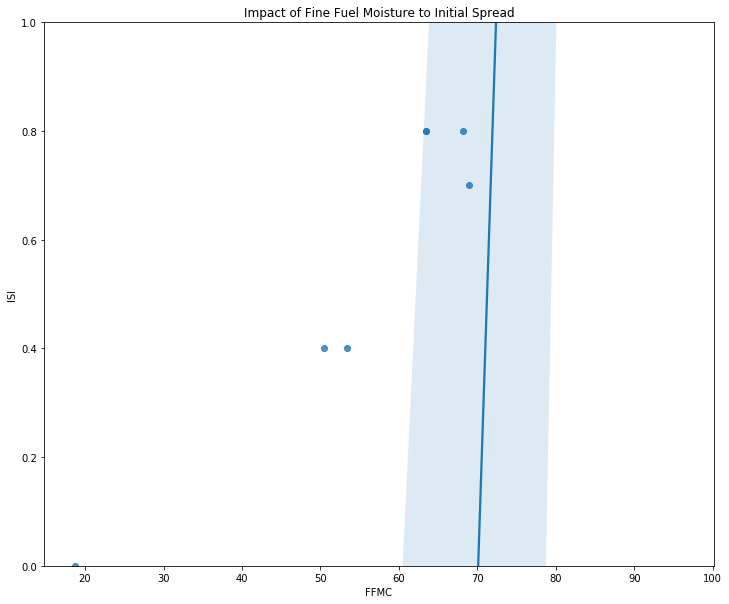

In [71]:
# define the width and height
height = 10
width = 12
# plot with plt
plt.figure(figsize=(width,height))
# regplot with sns 
plt.ylim(0,)
sns.regplot(x="FFMC" ,y="ISI" ,data=ff_new)
# title
plt.title("Impact of Fine Fuel Moisture to Initial Spread")

## Multiple Linear Regresion

In [84]:
# determine the data into feature (x) and target(y)
# DMC (duff moisture code), DC (drought code), and FFMC (Fine Fuel Moisture Code) are Feature (X)
X = ff_new[['DMC','DC','FFMC']]

# Temp is Target (Y)
y = ff_new[['temp']]

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

# # get shape of train and test data
# training data
print("Training Data :", X_train.shape)
# testing data
print("Testing Data :", X_test.shape)

Training Data : (413, 3)
Testing Data : (104, 3)


### 1. Define Function

In [85]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 2. Fit the Training Data

In [86]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 3. Use the Function

determine two fitted training data each into coefisien and intercept

In [87]:
# Coefisien
print("Variable A :", lm.coef_)
# Intercept
print("Variable B :", lm.intercept_)

Variable A : [[0.01629644 0.00696092 0.25540044]]
Variable B : [-9.81764862]


### 4. Evaluate the Training Data

In [88]:
print("Accuracy of Training Data :", lm.score(X_train, y_train))

Accuracy of Training Data : 0.3331907052452737


### 5. Predict the Testing Data

Create Prediction 

In [89]:
y_predict = lm.predict(X_test)
y_predict

array([[22.88153636],
       [21.35913152],
       [14.53702369],
       [23.92464892],
       [22.53939478],
       [20.62852564],
       [17.22925843],
       [11.5300276 ],
       [14.67783814],
       [22.85722998],
       [12.061567  ],
       [19.74809765],
       [15.06437818],
       [13.29312608],
       [22.87220482],
       [21.058855  ],
       [18.83385166],
       [22.71523578],
       [20.6716921 ],
       [20.66362584],
       [12.14487338],
       [22.85722998],
       [20.4598485 ],
       [20.20137387],
       [13.29312608],
       [23.01288339],
       [14.8369589 ],
       [17.76120122],
       [14.53702369],
       [21.27666569],
       [21.3824519 ],
       [21.56707376],
       [18.7114535 ],
       [19.89877212],
       [11.20352821],
       [18.81523863],
       [19.53985835],
       [14.53702369],
       [20.66170508],
       [14.84171084],
       [20.66362584],
       [21.25830972],
       [20.81893998],
       [16.59845488],
       [13.99318003],
       [21

Accuracy of Testing Data

In [90]:
print("Accuracy of Testing Data :", lm.score(X_test, y_test))

Accuracy of Testing Data : 0.36548158586984814


Mean Square Error

In [91]:
print("Mean Squared error of Testing Data :", mean_squared_error(y_test, y_predict))

Mean Squared error of Testing Data : 20.955496263204353


## Comparing the Result of Testing Data Accuracy from Single and Multiple Linear

<h4>Single Linear Regresion</h4>
<ul>
  <li>Akurasi Data Testing : 0.32210331014372684</li>
  <li>Mean Square Error Data Testingnya : 11.77262304403833</li>
</ul>
<h4>Multiple Linear Regresion</h4>
<ul>
  <li>Akurasi Data Testing : 0.36548158586984814</li>
  <li>Mean Square Error Data Testingnya : 20.955496263204353</li>
</ul>